### Palmer Archipelago (Antarctica) penguin dataset

In this notebook, we make a quick presentation of the Palmer penguins dataset dataset. We can use this dataset for both classification and regression problems by selecting a subset of the features to make our explanations intuitive.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [2]:
gdrive_path = 'gdrive/MyDrive/'
course_path = gdrive_path + 'UBB ML/'

lecture_path = course_path + 'Lecture_2_Git_Python_Recap_Data_Handling/'
data_path = lecture_path + 'data'
data_path

'gdrive/MyDrive/UBB ML/Lecture_2_Git_Python_Recap_Data_Handling/data'

In [3]:
import pandas as pd

penguins = pd.read_csv(data_path + "/penguins_size.csv")

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset consists of 7 columns.

* **species**: penguin species (Chinstrap, Adélie, or Gentoo)
* **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)   
* **culmen_length_mm**: culmen length (mm)  
* **culmen_depth_mm**: culmen depth (mm)  
* **flipper_length_mm**: flipper length (mm)  
* **body_mass_g**: body mass (g)  
* **sex**: penguin sex  

What are culmen length & depth?  
The culmen is "the upper ridge of a bird's beak"  



What are flippers?
Penguins wings are called flippers. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip.

## Understanding the data

In [ ]:
penguins.shape

(344, 7)

#### Missing values

In [ ]:
missing_values = penguins.isnull().sum()

In [ ]:
missing_values

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [ ]:
# Handling missing values
from sklearn.impute import SimpleImputer
# Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median
penguins.iloc[:,:] = imputer.fit_transform(penguins)

In [ ]:
penguins.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


#### Convert sex column to integer values

In [ ]:
penguins['sex'][:5]

,sex
0,MALE
1,FEMALE
2,FEMALE
3,MALE
4,FEMALE


In [ ]:
penguins['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
# Encode target labels with value between 0 and n_labels-1.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
penguins["sex"] = label_encoder.fit_transform(penguins["sex"])
penguins['sex'][:5]

,sex
0,2
1,1
2,1
3,2
4,1


#### Analysing data visually

Number of Species

In [ ]:
penguins['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


The penguins dataset has different number of samples for each species.

Scatterplot  
The scatter plot which shows us the correlation with respect to other features.   This method helps just to figure out the important features which account the most for the classification in our model.

In [ ]:
!pip install plotnine

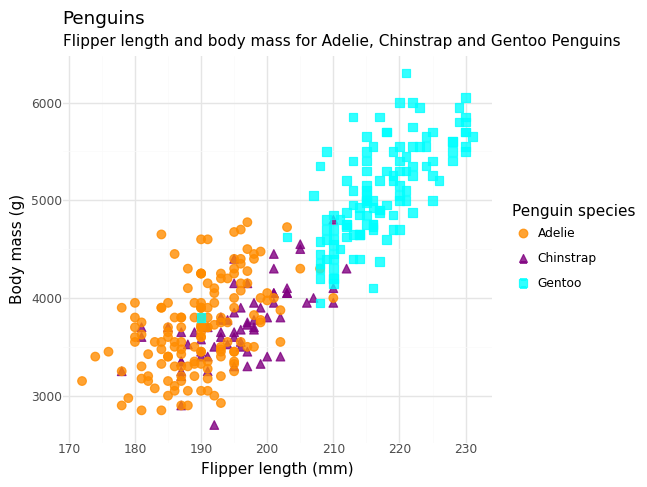

In [ ]:
from plotnine import *

# Creating the ggplot
plot = (
    ggplot(penguins, aes(x='flipper_length_mm', y='body_mass_g', color='species', shape='species')) +
    geom_point(size=3, alpha=0.8) +
    scale_color_manual(values=["darkorange", "purple", "cyan"]) +
    labs(
        title="Penguins",
        subtitle="Flipper length and body mass for Adelie, Chinstrap and Gentoo Penguins",
        x="Flipper length (mm)",
        y="Body mass (g)",
        color="Penguin species",
        shape="Penguin species"
    ) +
    theme_minimal()
)

# Show the plot
plot.draw()

## Classification dataset

We use this dataset in classification setting to predict the penguins’ species from anatomical information.   
([Thanks to Inria Machine Learning Concepts](https://inria.github.io/scikit-learn-mooc/python_scripts/trees_dataset.html)).

Each penguin is from one of the three following species: Adelie, Gentoo, and Chinstrap.

This problem is a classification problem since the target is categorical. We limit our input data to a subset of the original features to simplify our explanations when presenting the decision tree algorithm. Indeed, we use features based on penguins’ culmen measurement.

We start by loading this subset of the dataset.

In [ ]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [ ]:
culmen_columns = ['culmen_length_mm', 'culmen_depth_mm']
target_column = ['species']

columns_classification = culmen_columns + target_column

In [ ]:
columns_classification

['culmen_length_mm', 'culmen_depth_mm', 'species']

Subset the dataframe.

In [ ]:
penguins_classification = penguins[[column for column in penguins.columns if column in columns_classification]]

Let’s check the dataset more into details.

In [ ]:
penguins_classification.head()

,species,culmen_length_mm,culmen_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,41.1,17.0
4,Adelie,36.7,19.3


Since that we have few samples, we can check a scatter plot to observe the samples distribution.

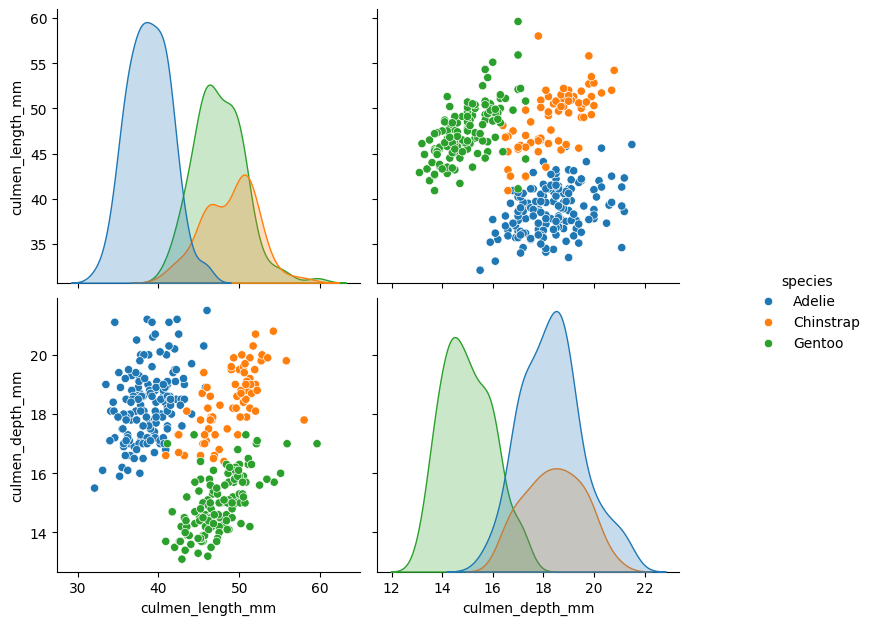

In [ ]:
import seaborn as sns

pairplot_figure = sns.pairplot(penguins_classification, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)

First let’s check the feature distributions by looking at the diagonal plots of the pairplot. We can deduce the following intuitions:  

* The Adelie species can be differentiated from the Gentoo and Chinstrap species depending on the culmen length;  

* The Gentoo species can be differentiated from the Adelie and Chinstrap species depending on the culmen depth.  

## Regression dataset

In a regression setting, the target is a continuous variable instead of categories. Here, we use two features of the dataset to make such a problem: the flipper length and culmen length iare used as features and the body mass as the target. In short, we want to predict the body mass using the flipper and culmen length.

We load the dataset and visualize the relationship between the flipper length and the body mass of penguins.

In [ ]:
feature_name_1 = 'flipper_length_mm'
target_column = 'body_mass_g'

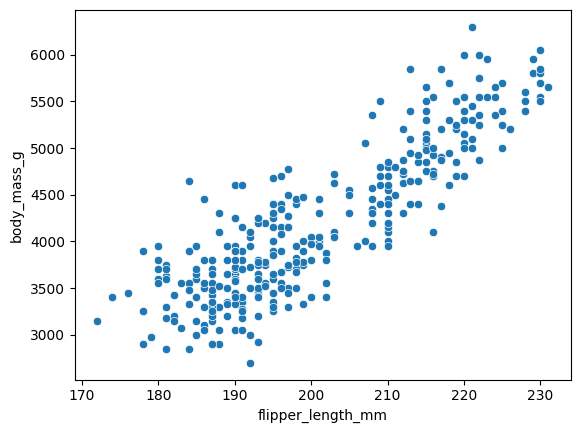

In [ ]:
import seaborn as sns
scatterplot_figure = sns.scatterplot(data=penguins, x=feature_name_1, y=target_column)

Here, we deal with a regression problem because our target is a continuous variable ranging from 2.7 kg to 6.3 kg. From the scatter plot above, we observe that we have a linear relationship between the flipper length and the body mass. The longer the flipper of a penguin, the heavier the penguin.

In [ ]:
feature_name_2 = 'culmen_length_mm'
target_column = 'body_mass_g'

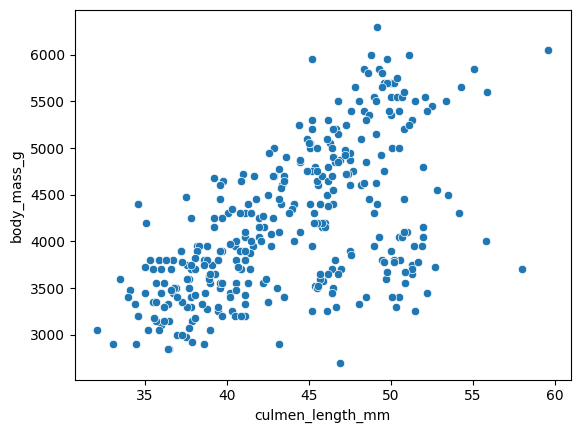

In [ ]:
_ = sns.scatterplot(data=penguins, x=feature_name_2, y=target_column)

In [ ]:
feature_columns = [feature_name_1, feature_name_2]
target_column = ['body_mass_g']

columns_regression = feature_columns + target_column

In [ ]:
penguins_regression = penguins[[column for column in penguins.columns if column in columns_regression]]

In [ ]:
penguins_regression.head()

,culmen_length_mm,flipper_length_mm,body_mass_g
0,39.1,181.0,3750.0
1,39.5,186.0,3800.0
2,40.3,195.0,3250.0
3,41.1,190.0,3800.0
4,36.7,193.0,3450.0


#### Lasso regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Select relevant columns
data = penguins_regression

# Drop rows with missing values
data = data.dropna()

# Split the data into features (X) and target variable (y)
X = data[['flipper_length_mm', 'culmen_length_mm']]
y = data['body_mass_g']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False, random_state=42)

# Standardize the features
# Compare the effect of different scalers on data with outliers:
# # https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Lasso regression model
alpha = 0  # regularization strength (adjust as needed)
max_iter = 10  # specify the maximum number of iterations
lasso_model = Lasso(alpha=alpha, max_iter=max_iter)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 99896.69955192292


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.303e+07, tolerance: 1.336e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.


Get Lasso coefficients

In [ ]:
# Get Lasso coefficients
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

# Display coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 3974.1818181818185
Coefficients: [553.35432209  18.23400024]


Does it overfit?

In [ ]:
# Make predictions on both training and testing sets
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model on both sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Display Mean Squared Errors
print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')

Training MSE: 167493.97141807232
Testing MSE: 99896.69955192292


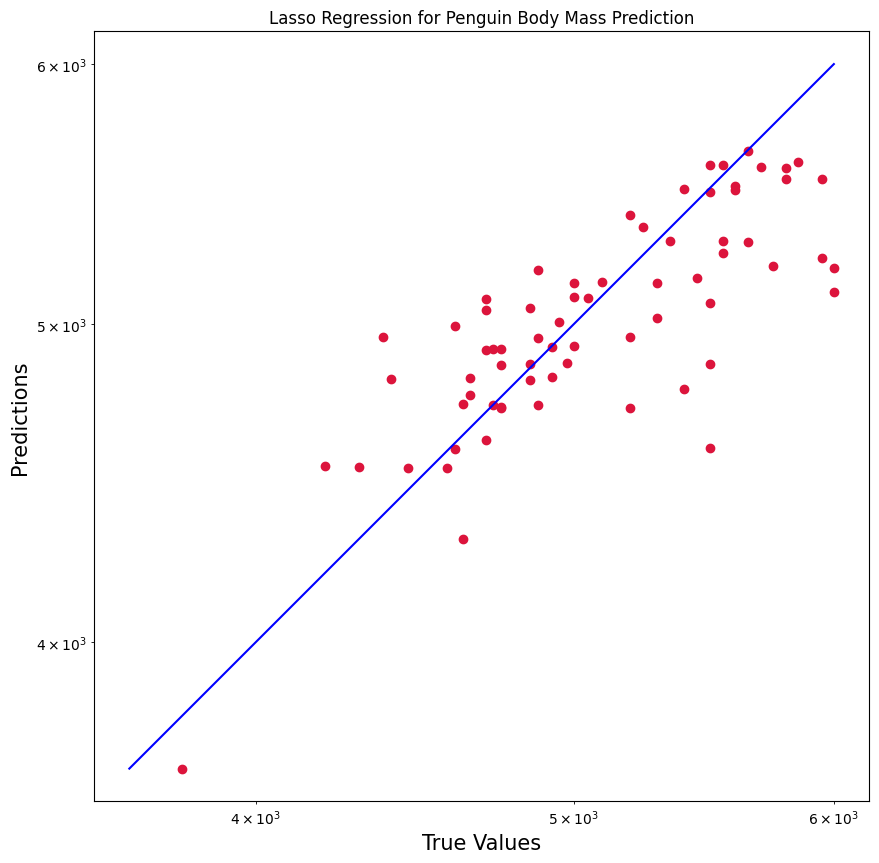

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Lasso Regression for Penguin Body Mass Prediction')
plt.axis('equal')
plt.show()

In [ ]:
y_test[:10]

,body_mass_g
275,5050.0
276,4300.0
277,5000.0
278,4450.0
279,5550.0
280,4200.0
281,5300.0
282,4400.0
283,5650.0
284,4700.0


In [ ]:
y_test_pred[:10]

array([5093.56705337, 4521.83499305, 5095.24326918, 4519.82353407,
       5300.90656493, 4526.86364049, 5144.89906652, 4812.05918432,
       5645.14471465, 5048.93990347])